**Prediction of employee promotion potential**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

import os
# print(os.chdir("C:/Users\Santosh\Desktop\Major project"))

# Any results you write to the current directory are saved as output.

In [8]:
df = pd.read_csv('train.csv')
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

**Distribution of employees across various departments**

In [9]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

**Percentage of people who got promoted from each department**

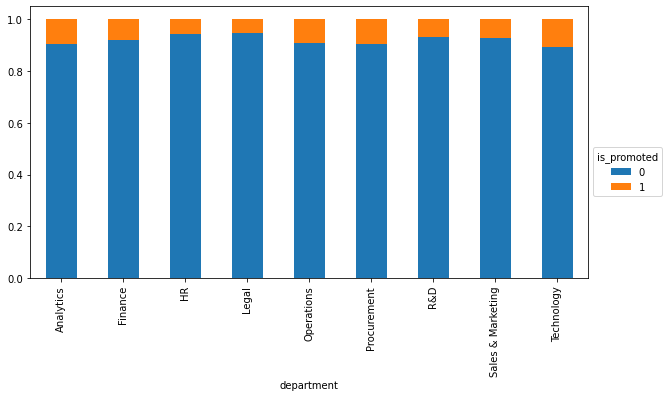

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(df.department,df.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

While Technology department had highest percentage of employees getting promoted, Legal department has the least number. But we don't see major differences in terms of percentages.

**Percentage of promotions across all the regions**

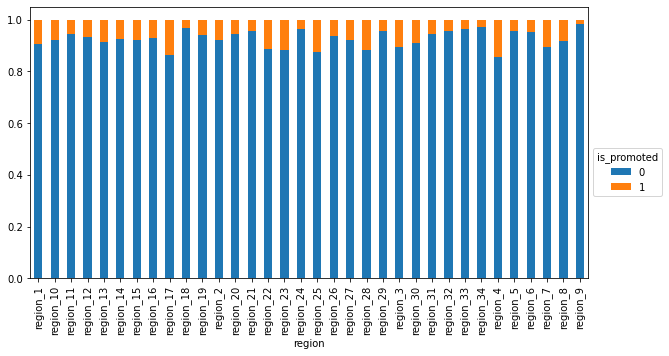

In [11]:
reg = pd.crosstab(df.region,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

**Distribution of promotions among people with different Educational backgrounds**

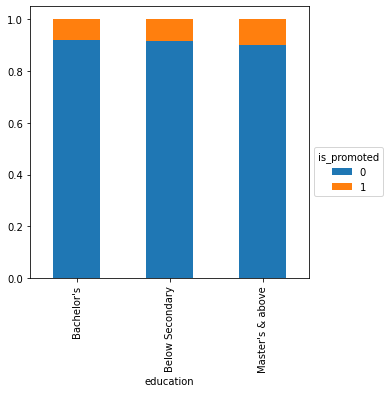

In [12]:
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(df.education,df.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

As we can see the percentages are pretty much the same aross different educational backgrounds.

**Variation of promotion percentage with respect to gender**

In [13]:
pd.crosstab(df.gender,df.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151


There is major differnce in percentages across genders too. 
Let us check if differnce arises within the departments

**Variation of promotion percentage with recruitment channel that they have come from**

In [14]:
pd.crosstab(df.recruitment_channel,df.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


According to the data, percentage of promotions is higher among the employees who got recruited through referrals.

**Variation of promotion percentage with respect to KPIs met or not**

In [15]:
pd.crosstab(df['KPIs_met >80%'],df.is_promoted,normalize='index')

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


Higher percentage of employees got promoted in the group of people whose KPIs_met is greater than 80%.

Let us check if there is any ratio difference across gender within the departments. For this I chose the top 3 highly populated departments.

In [16]:
sales = df[df['department']=='Sales & Marketing']
operations = df[df['department']=='Operations']
technology = df[df['department']=='Technology']
hr = df[df['department']=='HR']
fin = df[df['department']=='Finance']
legal = df[df['department']=='Legal']
RnD = df[df['department']=='R&D']
pd.crosstab(sales.gender,sales.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.944198,0.055802
m,0.924229,0.075771


In [17]:
pd.crosstab(operations.gender,operations.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.905495,0.094505
m,0.912907,0.087093


In [18]:
pd.crosstab(technology.gender,technology.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.900646,0.099354
m,0.887126,0.112874


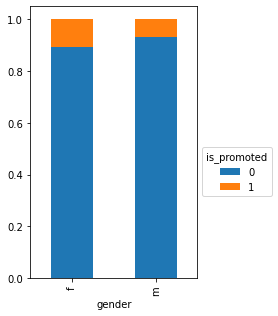

In [23]:
plt.rcParams['figure.figsize'] = [3, 5]
gender = pd.crosstab(RnD.gender,RnD.is_promoted,normalize='index')
gender.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Slight difference in the ratios can be seen within the departments unlike the ratios calculated without any department barriers.

**Difference in the percentage of promoted employees with respect to previous year ratings**

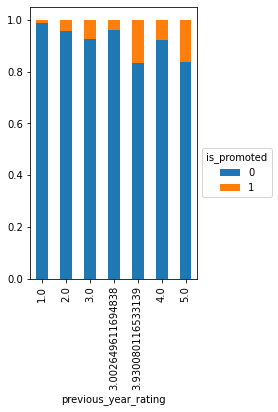

In [24]:
rating = pd.crosstab(df.previous_year_rating,df.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

The ratio of promoted employees increases with previous year rating which is quite obvious.

**Distribution of average training score**

In [25]:
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df['score_binned'] = pd.cut(df['avg_training_score'], bins=bins, labels=labels)
df['score_binned'].value_counts()

50-60     16020
40-50     11996
60-70      9973
80-90      8739
70-80      7494
90-100      579
30-40         7
Name: score_binned, dtype: int64

While most of the employees have score in the range of 50-60, the least score bin has very faint number,

**Distribution of promoted employees ratio across different score ranges**

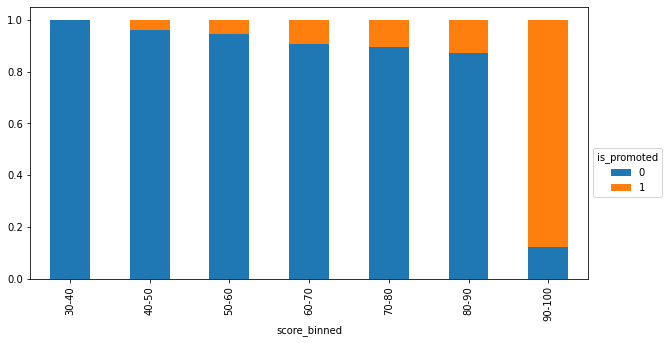

In [26]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.score_binned,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Promotions ratio increases with the score and the ratio is very high in 90-100 range which means getting promoted is highly dependent on the average score.

**Distribution of promotion ratios with respect to age**

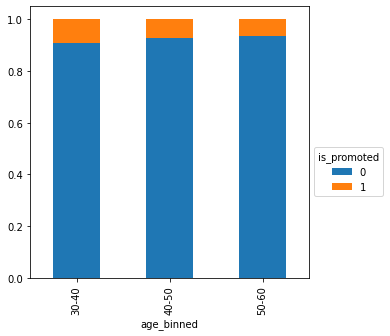

In [27]:
plt.rcParams['figure.figsize'] = [5, 5]
age_bins = [20,30,40,50,60]
age_labels = ['20-30','30-40','40-50','50-60']
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_binned'].value_counts()
age_bin = pd.crosstab(df.age_binned,df.is_promoted,normalize='index')
age_bin.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Ratio doesn't vary much with age.

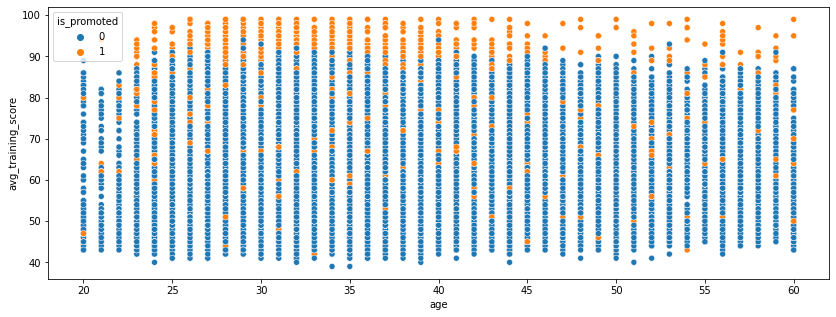

In [28]:
plt.rcParams['figure.figsize'] = [14, 5]
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=df)

This graph reinforces the fact the promotions are majorly dependent on the score and not on age.

**Mean score of employees with different educational background**

In [29]:
df.groupby(["education"])['avg_training_score'].mean()

education
Bachelor's          63.097446
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

Mean training score doesn't vary with education

**Filling the missing values**

In [30]:
df.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
score_binned            False
age_binned               True
dtype: bool

Fill missing values of  'previous_year_rating' with mean based on 'KPIs_met >80%' and 'education'  with median based on 'department'

In [31]:
df['previous_year_rating'] = df.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(x.mean()))
df["education"] = df["education"].astype('object')
df['education'] = df.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))

**Feature engineering**
Normalize all the numerical features and encode all the categorical features.

In [32]:
scaled_features = df.copy()
col_names = ['no_of_trainings', 'age','previous_year_rating','length_of_service','awards_won?','avg_training_score']
label_names = ['department','gender','recruitment_channel','region']
features = scaled_features[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.get_dummies(scaled_features, columns=label_names, drop_first=True)
scaled_features[col_names] = features
scaled_features.drop(columns=['employee_id','age','education','score_binned','age_binned'],inplace=True)

The transformed features are fit to a Gradient Boosting Algorithm.
Grid Search cross validation is used to find the best hyperparameter('n_estimators')

### Gradient Boosting

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features.loc[:, scaled_features.columns != 'is_promoted'], scaled_features['is_promoted'], test_size=0.33, random_state=42)
#forest = RandomForestClassifier(n_jobs=-1, random_state=0,class_weight='balanced',n_estimators=100,bootstrap=True, max_depth=80)
forest = GradientBoostingClassifier(loss='exponential',max_features='auto')
param_grid = {
    'n_estimators': [200,500,800]
}
grid_search1 = GridSearchCV(estimator = forest, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search1.fit(X_train, y_train)
grid_search1.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 800}

In [37]:
pred1 = grid_search1.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred1)
'accuracy - '+str(accuracy)

'accuracy - 0.9449881130093437'

## AdaBoost

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features.loc[:, scaled_features.columns != 'is_promoted'], scaled_features['is_promoted'], test_size=0.33, random_state=42)
#forest = RandomForestClassifier(n_jobs=-1, random_state=0,class_weight='balanced',n_estimators=100,bootstrap=True, max_depth=80)
Ada = AdaBoostClassifier()
param_grid = {
    'n_estimators': [200,500,800]
}
grid_search2 = GridSearchCV(estimator = Ada, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search2.fit(X_train, y_train)
grid_search2.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 800}

In [39]:
pred2 = grid_search2.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred2)
'accuracy - '+str(accuracy)

'accuracy - 0.9301155526068446'

### XGBoost

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features.loc[:, scaled_features.columns != 'is_promoted'], scaled_features['is_promoted'], test_size=0.33, random_state=42)
#forest = RandomForestClassifier(n_jobs=-1, random_state=0,class_weight='balanced',n_estimators=100,bootstrap=True, max_depth=80)
XG = XGBClassifier()
param_grid = {
    'n_estimators': [200,500,800]
}
grid_search3 = GridSearchCV(estimator = XG, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search3.fit(X_train, y_train)
grid_search3.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 800}

In [43]:
pred3 = grid_search3.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred3)
'accuracy - '+str(accuracy)

'accuracy - 0.9457068612815834'

## RandomForest

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features.loc[:, scaled_features.columns != 'is_promoted'], scaled_features['is_promoted'], test_size=0.33, random_state=42)
#forest = RandomForestClassifier(n_jobs=-1, random_state=0,class_weight='balanced',n_estimators=100,bootstrap=True, max_depth=80)
RFC = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,500,800]
}
grid_search4 = GridSearchCV(estimator = RFC, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search4.fit(X_train, y_train)
grid_search4.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 500}

In [45]:
pred4 = grid_search4.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred4)
'accuracy - '+str(accuracy)

'accuracy - 0.9340410239398463'

## According to our analysis XGBoost algorithm is the best for Employee Promotion Prediction

 We are given the dataset of random company employee repository.We have to show which employee have the right credential to get the promotion.We use XGBoost algorithm to predict the list of employee who are most likely to get promotion.

In [51]:
df2=pd.read_csv("test.csv")

In [52]:
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df2['score_binned'] = pd.cut(df['avg_training_score'], bins=bins, labels=labels)
df2['score_binned'].value_counts()

50-60     6859
40-50     5104
60-70     4263
80-90     3802
70-80     3214
90-100     242
30-40        6
Name: score_binned, dtype: int64

In [53]:
plt.rcParams['figure.figsize'] = [5, 5]
age_bins = [20,30,40,50,60]
age_labels = ['20-30','30-40','40-50','50-60']
df2['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
df2['age_binned'].value_counts()


30-40     11078
40-50      3355
50-60      1219
60-70         0
70-80         0
80-90         0
90-100        0
Name: age_binned, dtype: int64

In [54]:
df2['previous_year_rating'] = df2.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(x.mean()))
df2["education"] = df2["education"].astype('object')
df2['education'] = df2.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [55]:
scaled_features2 = df2.copy()
col_names = ['no_of_trainings', 'age','previous_year_rating','length_of_service','awards_won?','avg_training_score']
label_names = ['department','gender','recruitment_channel','region']
features = scaled_features2[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features2 = pd.get_dummies(scaled_features2, columns=label_names, drop_first=True)
scaled_features2[col_names] = features
scaled_features2.drop(columns=['employee_id','age','education','score_binned','age_binned'],inplace=True)

In [56]:

#forest = RandomForestClassifier(n_jobs=-1, random_state=0,class_weight='balanced',n_estimators=100,bootstrap=True, max_depth=80)
XG = XGBClassifier()
param_grid = {
    'n_estimators': [200,500,800]
}
grid_search3 = GridSearchCV(estimator = XG, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search3.fit(scaled_features.drop("is_promoted",axis=1),scaled_features["is_promoted"])
grid_search3.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 500}

In [57]:
is_promoted=grid_search3.predict(scaled_features2)
is_promoted=pd.DataFrame(is_promoted)

In [58]:
df3=pd.concat([df2,is_promoted],axis=1)

In [59]:
df3[df3[0]==1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,score_binned,age_binned,0
78,10732,Analytics,region_2,Bachelor's,m,other,1,31,5.0,5,1,0,92,90-100,NaN,1
118,27495,Operations,region_2,Master's & above,m,other,2,43,3.0,2,0,0,69,70-80,NaN,1
122,3901,Technology,region_13,Master's & above,m,other,1,38,5.0,2,0,0,88,90-100,30-40,1
124,55735,Technology,region_31,Master's & above,m,other,1,39,5.0,4,0,1,81,70-80,40-50,1
139,63901,HR,region_7,Bachelor's,m,other,1,31,2.0,5,0,0,66,70-80,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23321,60834,Procurement,region_11,Master's & above,m,sourcing,1,40,5.0,11,0,0,78,40-50,NaN,1
23382,5452,Sales & Marketing,region_7,Bachelor's,m,other,1,46,4.0,14,0,0,61,90-100,NaN,1
23387,29019,Analytics,region_22,Bachelor's,m,other,3,28,5.0,3,0,0,91,50-60,NaN,1
23454,55030,Sales & Marketing,region_28,Master's & above,m,other,1,32,2.0,6,0,1,59,60-70,40-50,1
